In [1]:
import pandas as pd
import plotly
from plotly.colors import n_colors
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
import json
from IPython.display import Image

In [2]:
df_srag = pd.read_csv('csvs/srag_final2.csv', sep=';', low_memory=False)

In [3]:
df_srag.head(1)

,DT_NOTIFIC,SEM_NOT,CS_SEXO,NU_IDADE_N,SG_UF_NOT,HOSPITAL,UTI,CLASSI_FIN,EVOLUCAO
0,2020-07-08,28,M,57,SP,Sim,Não,SRAG por COVID-19,Cura


In [4]:
daily_srag_covid = pd.read_csv('csvs/daily_srag_covid.csv', sep=';')

In [5]:
daily_srag_covid.head()

,DT_NOTIFIC,SEM_NOT,CASOS_SRAG,CASOS_COVID
0,2019-12-29,1,1,0
1,2019-12-30,1,5,0
2,2019-12-31,1,13,0
3,2020-01-01,1,7,0
4,2020-01-02,1,38,0


In [6]:
daily_srag_covid = daily_srag_covid.iloc[:,1:4]
daily_srag_covid.head()

,SEM_NOT,CASOS_SRAG,CASOS_COVID
0,1,1,0
1,1,5,0
2,1,13,0
3,1,7,0
4,1,38,0


In [7]:
week_covid = daily_srag_covid.groupby(['SEM_NOT']).sum()

In [8]:
week_covid = week_covid.reset_index()

In [9]:
df = pd.read_csv('csvs/srag_hosp.csv', sep=';')
df_uti = df[df['HOSPITALIZAÇÃO'] == 'UTI']
df_nuti = df[df['HOSPITALIZAÇÃO'] == 'Não UTI']

In [10]:
df_uti.head()

,SEMANA_EPI,HOSPITALIZAÇÃO,TOTAL
1,1,UTI,7987
3,2,UTI,3713
5,3,UTI,1412
7,4,UTI,802
9,5,UTI,731


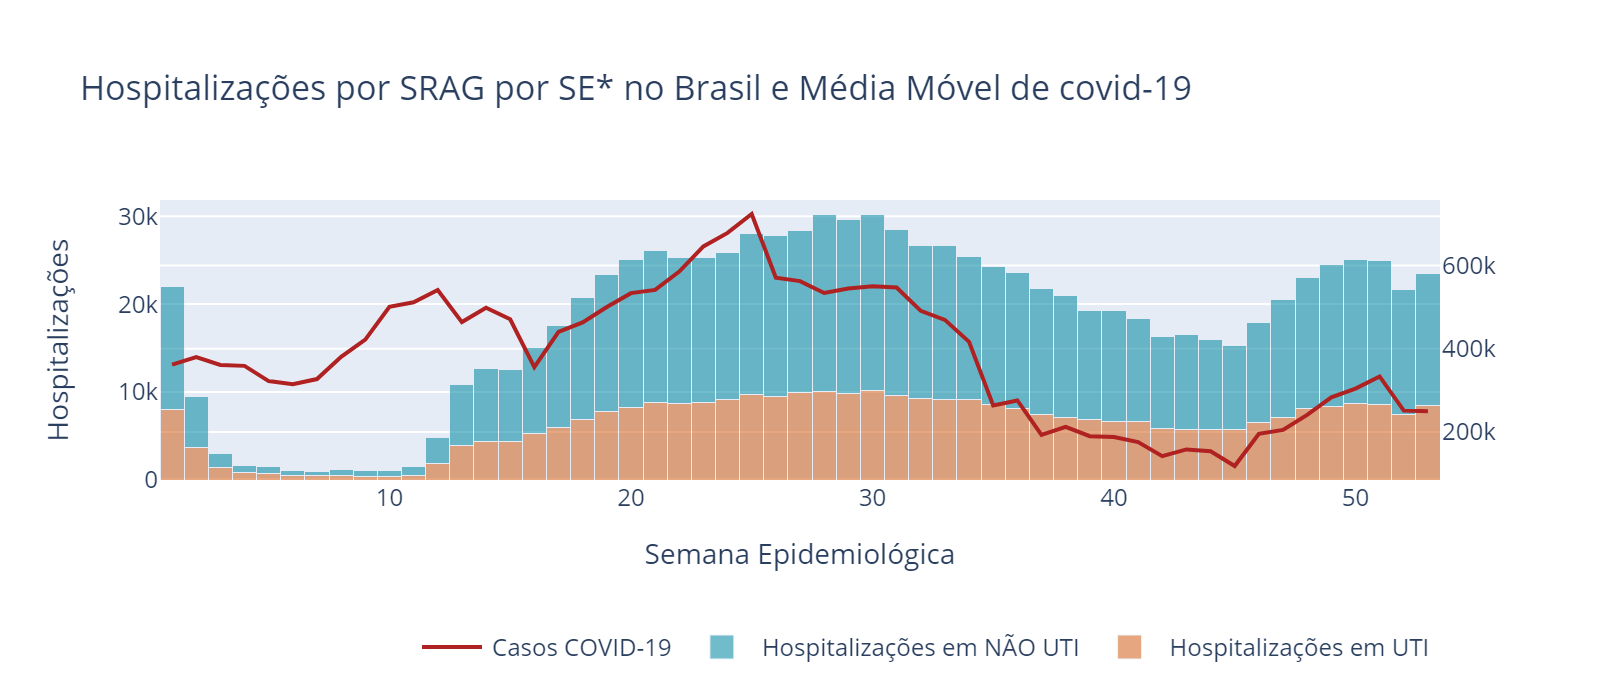

In [11]:
colors = {'A':'#d46c2c',
          'B':'#1490a8','C':'#b02121'}

#df_uti = df_uti[df_uti['SEMANA_EPI'] >= 9]
#df_nuti = df[df['SEMANA_EPI'] >= 9]

trace1 = go.Bar(
    x=df_uti['SEMANA_EPI'],
    y=df_uti['TOTAL'],
    name='Hospitalizações em UTI', 
    marker_color=colors['A'],
    opacity=0.6,
    )

trace2 = go.Bar(
    x=df_uti['SEMANA_EPI'],
    y=df_nuti['TOTAL'],
    name='Hospitalizações em NÃO UTI',
    marker_color=colors['B'],
    opacity=0.6,
    )

trace3 = go.Scatter(
    x=df_uti['SEMANA_EPI'],
    y=week_covid['CASOS_COVID'],
    name='Casos COVID-19',
    marker_color=colors['C'],
    yaxis='y2'
    )

data=[trace1, trace2, trace3]

layout= go.Layout(
    barmode= 'stack',
    bargap=0.0,
    title='Hospitalizações por SRAG por SE* no Brasil e Média Móvel de covid-19',
    xaxis=dict(title='Semana Epidemiológica'),
    yaxis=dict(title='Hospitalizações'),
    yaxis2=dict(overlaying='y',side='right')
)
fig= go.Figure(data=data, layout=layout)
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=-0.7, xanchor="right", x=1,))

#fig.show()

# Mostrando o gráfico em formato estático. Github não renderiza formato dinâmico da biblioteca Plotly.
img_bytes = fig.to_image(format="png", width=800, height=350, scale=2)
Image(img_bytes)